<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_applications_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

In this example, we are going to see how to use them por prediction.
For more information, see `tensorflow.keras.applications` [documentation](https://keras.io/api/applications/). More specifically, we will make use of the ResNet50 arechitecture for prediction purposes.


<img align="left" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/icon_book.png" width=50 px>

*He, K., Zhang, X., Ren, S., & Sun, J. (2016). **Deep residual learning for image recognition**. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).*

# Image classification example for prediction

In this example, and commented in the introduction we will introduce an example for image classification. Therefore, the first step is to download a sample image to be used later.

In [1]:
# Get the image from the repository:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/church.jpg -O church.jpg
IMG_NAME = 'church.jpg'

--2021-04-03 10:39:25--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/church.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72909 (71K) [image/jpeg]
Saving to: ‘church.jpg’

church.jpg          100%[===================>]  71.20K  --.-KB/s    in 0.009s  

2021-04-03 10:39:26 (7.78 MB/s) - ‘church.jpg’ saved [72909/72909]



We code the function `show_predictions()` to print (show) the results over the image.

In [2]:
# Example prediction: '[('n03028079', 'church', 0.9948196), ('n03220513', 'dome', 0.0017718963), ('n03781244', 'monastery', 0.0013527332)]'
# Draw on the image the class and probability associated with the top prediction:
def show_predictions(predictions, img):
  text = "label: {}\nprob: {:.2f}%".format(predictions[0][1], predictions[0][2] * 100)

  y0, dy = 10, 20
  for i, line in enumerate(text.split('\n')):    
    y = y0 + i * dy
    cv2.putText(img, line, (5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)
  
  return img

We define also a utility function that we need to check the range of a NumPy array (e.g. an image).

In [3]:
import numpy as np

def range_arr(x):
    return np.min(x), np.max(x)

And test it:

In [4]:
arr_1 = np.array([1,2,3]) # shape: (3,)
arr_2 = np.array([[1, -2], [3,4]]) # shape: (2,2)

print("range array 1: {}".format(range_arr(arr_1)))
print("range array 2: {}".format(range_arr(arr_2)))

range array 1: (1, 3)
range array 2: (-2, 4)


In this case, we are using [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function) model for prediction purposes. Note that one of the arguments of `tf.keras.applications.ResNet50()` is `include_top=True`, which  includes the fully-connected layer at the top of the network. In addition, the documentation of ResNet50 can be seen [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), as part of the TensorFlow documentation.

102973440/102967424 [==============================] - 1s 0us/step
Shape of the image: (1, 224, 224, 3)
Range image: (0.0, 243.0)
Range image: (-123.68, 139.061)
40960/35363 [==================================] - 0s 0us/step
Predicted: [('n03028079', 'church', 0.9948196), ('n03220513', 'dome', 0.001771898), ('n03781244', 'monastery', 0.0013527293)]


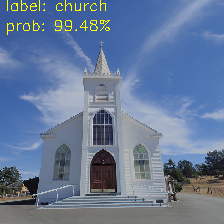

In [5]:
# Import required packages:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Instantiates the ResNet50 architecture with the weights pre-trained on ImageNet
model = ResNet50(weights='imagenet')

# 1) Load the image (PIL format):
img_loaded = image.load_img(IMG_NAME, target_size=(224, 224))

# 2) Prepare the image to be predicted:
# convert a PIL Image instance to a NumPy array
x = image.img_to_array(img_loaded)
x = np.expand_dims(x, axis=0)
print("Shape of the image: {}".format(x.shape))

# Check the range of the loaded image:
print("Range image: {}".format(range_arr(x)))

# Each Keras Application expects a specific kind of input preprocessing
# the images are converted from RGB to BGR, then each color channel is zero-centered
# with respect to the ImageNet dataset, without scaling.
x = preprocess_input(x)

# Check the range of the image:
print("Range image: {}".format(range_arr(x)))

# 3) predict:
preds = model.predict(x) # shape: (1, 1000) because only one image was used

# 4) Decode the predictions:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# As we predict only one image, we get the first element of the list:
decoded_preds = decode_predictions(preds, top=3)[0]

# 5) Show the results:
# convert the image from PIL to OpenCV format (commented line can also be used):
# (to do it, we first get the array and then, convert it from BGR to RGB)
# img_opencv = np.array(img_loaded)[:, :, ::-1].copy()
img_opencv_res =  image.img_to_array(img_loaded)[:, :, ::-1].copy()

print('Predicted:', decoded_preds)
img_opencv_res = show_predictions(decoded_preds, img_opencv_res)
cv2_imshow(img_opencv_res)

# Conclusions

In this example, we have used `tensorflow.keras.applications` to classify an image. More specifically, we have used `tensorflow.keras.applications.resnet50` pre-trained model on ImageNet. Note that there are many more available models (e.g. `Xception`, `VGG16`, `VGG19`, `ResNet50`, `ResNet101`, `ResNet152`, `ResNet50V2`, `ResNet101V2`, `ResNet152V2`, `InceptionV3`, `InceptionResNetV2`, `MobileNet`, `MobileNetV2`, `DenseNet121`, `DenseNet169`, `DenseNet201`, `NASNetMobile`, `NASNetLarge`, `EfficientNetB0`, `EfficientNetB1`, `EfficientNetB2`, `EfficientNetB3`, `EfficientNetB4`,  `EfficientNetB5`, `EfficientNetB6`, `EfficientNetB7`). Check [the documentation for Keras Applications](https://keras.io/api/applications/) to see more information about these available models (e.g. size of the pre-trained weights, Top-1 Accuracy, Top-5 Accuracy, Parameters, and Depth). 

Finally, note that the documentation for `tf.keras.applications` [can also be seen here as part of the TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

